In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
file='S05-hw-dataset.csv'
data = pd.read_csv(file, sep=',')
data.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [4]:
data.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [5]:
data.default.value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

В датасете содержится 17 признаков и 3000 объектов. После первичной проверки данных аномальных значений не выявлено. Признак, который будет вычисляться(default) разделён так: 0 - 59%, 1 - 41%.

In [6]:
X = data[['age', 'income', 'years_employed', 'credit_score',
       'debt_to_income', 'num_credit_cards', 'num_late_payments',
       'has_mortgage', 'has_car_loan', 'savings_balance', 'checking_balance',
       'region_risk_score', 'phone_calls_to_support_last_3m', 'active_loans',
       'customer_tenure_years']]
y = data['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)
Classifier = DummyClassifier(strategy="stratified")
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred_proba = Classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'Accuracy: {accuracy}')
print(f'AUC: {roc_auc}')
ad = accuracy
rd = roc_auc

Accuracy: 0.5293333333333333
AUC: 0.5086971851677735


Бейзлайн даёт минимально ожидаемый результат, который должна превзойти любая осмысленная модель. Как мы видим в среднем задача выполняется с 50% шансом, что показывает нам сложность задачи.

In [7]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
}
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="roc_auc",    # можно поменять на f1, recall и т.д.
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy_l = accuracy_score(y_test, y_pred)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc_l = roc_auc_score(y_test, y_pred_proba)
print(f'Accuracy: {accuracy_l}')
print(f'AUC: {roc_auc_l}')
al = accuracy_l
rl = roc_auc_l

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.7933333333333333
AUC: 0.8647088205911735


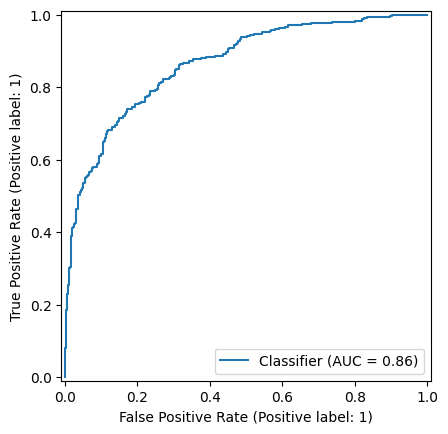

In [13]:
graf = RocCurveDisplay.from_predictions(
    y_test,
    y_pred_proba,
)
plt.savefig('figures/ROC.png')

In [8]:
comparison_df = pd.DataFrame({
    'Модель': ['Бейзлайн', 'Логистическая регрессия'],
    'Accuracy': [ad, al],
    'ROC-AUC': [rd, rl]
},)

comparison_df

,Модель,Accuracy,ROC-AUC
0,Бейзлайн,0.529333,0.508697
1,Логистическая регрессия,0.793333,0.864709


Как мы видим из полученных данных, бейзлайн значительно уступает по решению задачи относительно логистической регрессии. Accuaracy увеличилась на 29%, ROC-AUC на 37%. Логическая регресиия является лучшим решением в данной задачи, так как принимает множество решений относительно бейзлайна, которые делает свой прогноз на основе одного правила.